In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# To show graphs inside notebook
%matplotlib inline

# Set a nice style for graphs
sns.set(style="whitegrid")


In [3]:
#load dataset
df = pd.read_csv('titanic.csv')

In [4]:
#to show top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#to know count of columns and rows
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#to know overview of data for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# to know missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#fill the missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

In [13]:
#know categorical data summary
print(df['Sex'].value_counts())        # Count males and females
print(df['Pclass'].value_counts())     # Count passengers by class (1, 2, 3)
print(df['Embarked'].value_counts())   # Count passengers by port (C, Q, S)
print(df['Survived'].value_counts())   # Count survived vs not survived

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


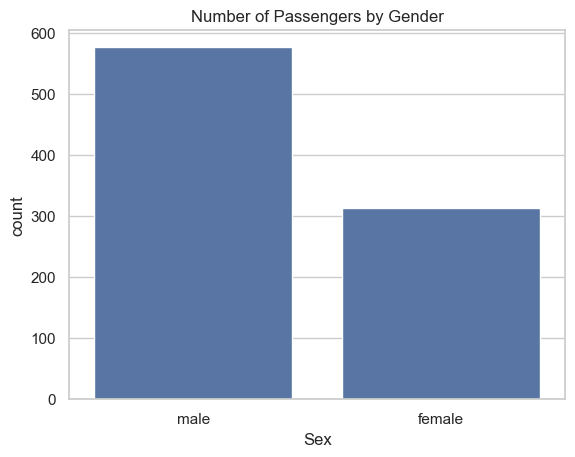

In [14]:
#visualize the males and female count
sns.countplot(x='Sex', data=df)
plt.title('Number of Passengers by Gender')
plt.show()

In [ ]:
### Observation: Number of Passengers by Gender

- The dataset contains **more male passengers** than female passengers.
- This imbalance in gender may have influenced overall survival statistics.
- It also helps explain why gender-specific survival analysis is important in the Titanic dataset.


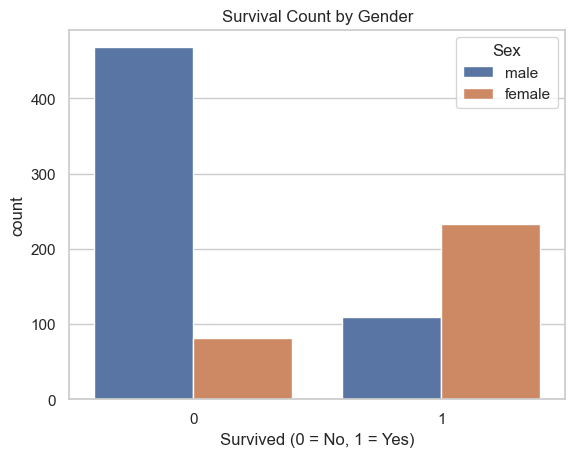

In [15]:
#visualize surival count
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
### Observation: Survival Count by Gender

- **Females had a significantly higher survival rate** compared to males.
- The majority of **male passengers did not survive**, whereas most female passengers **did survive**.
- This suggests that **women were given priority** during rescue efforts, aligning with the "women and children first" policy followed during the Titanic disaster.


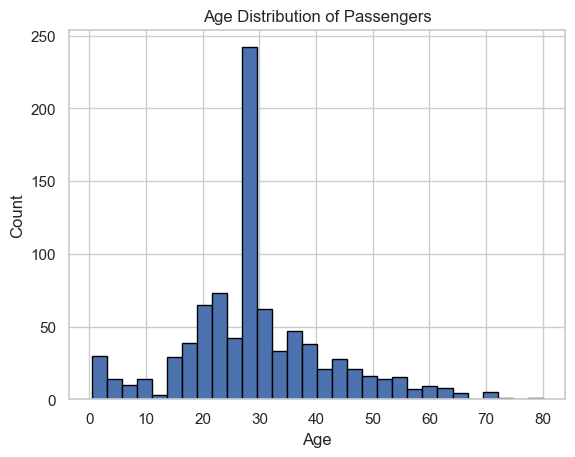

In [16]:
#visualize the age distribution
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
### Observation: Age Distribution of Passengers

- The age distribution is slightly **right-skewed**, with more passengers in the younger age ranges.
- The majority of passengers were between **20 and 40 years old**.
- There are fewer very young children and elderly passengers.
- This distribution helps us understand the overall age composition of the people aboard the Titanic.


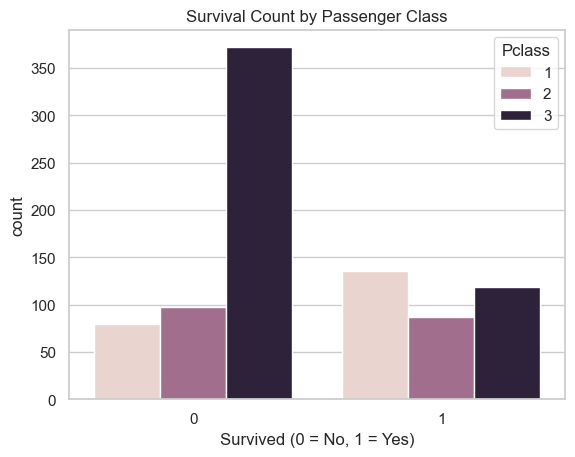

In [17]:
#survival count by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
### Observation: Survival by Passenger Class
- Passengers in 1st class had a much higher survival rate.
- 3rd class passengers had the lowest survival rate.

In [21]:
#Select only numeric columns and calculate their correlation matrix
corr = df.select_dtypes(include=['number']).corr()

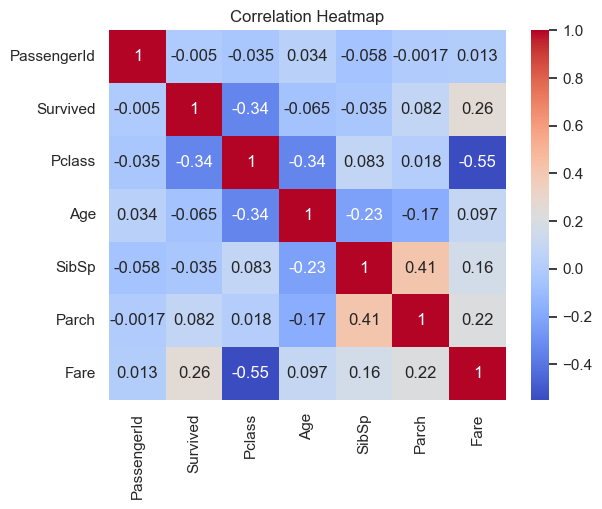

In [22]:
#visualize  correlarion heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
### Observation: Correlation Heatmap

- The heatmap shows the strength and direction of relationships between numerical features.
- **Pclass** and **Fare** have a moderate negative correlation, meaning higher class (lower number) relates to higher fare.
- **Age** shows weak correlation with other features.
- **Survived** correlates positively with **Fare** and negatively with **Pclass**, indicating passengers paying higher fares and in higher classes were more likely to survive.


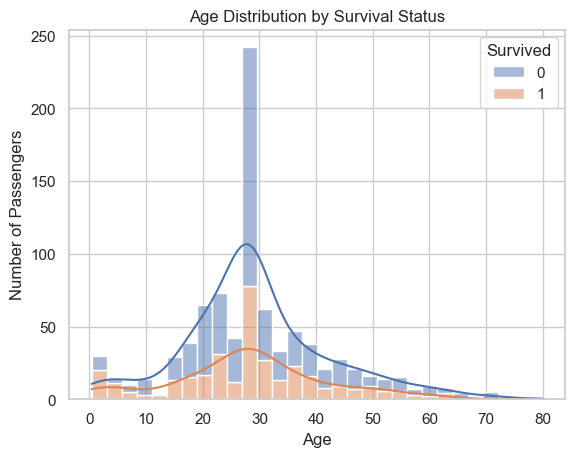

In [37]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
### Observation: Age Distribution by Survival Status

- The plot shows how age varies between survivors and non-survivors.
- **Younger passengers**, especially children, had higher survival rates.
- Many non-survivors are in the **young adult to middle-aged groups**.
- The kernel density estimate (KDE) lines confirm that survival probability was higher for younger ages.


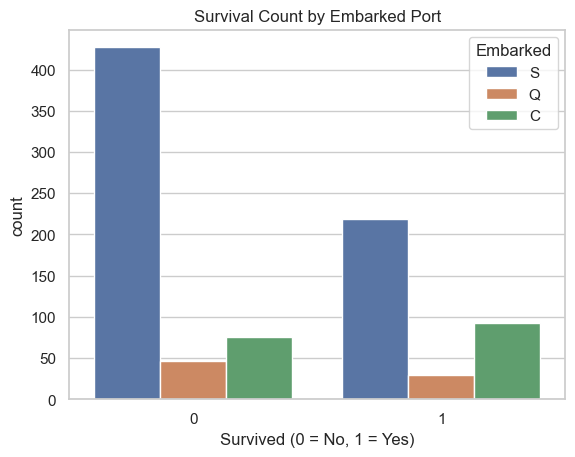

In [24]:
#Plot survival count by Embarked port
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
### Observation: Survival by Port of Embarkation

- Most passengers boarded from port **S (Southampton)**.
- Passengers who boarded from port **C (Cherbourg)** had a **higher survival rate** compared to those from S and Q.
- Passengers from **port Q (Queenstown)** had the lowest survival rate.
- This may be related to the socio-economic background of passengers from each port, as more wealthy passengers boarded at Cherbourg.


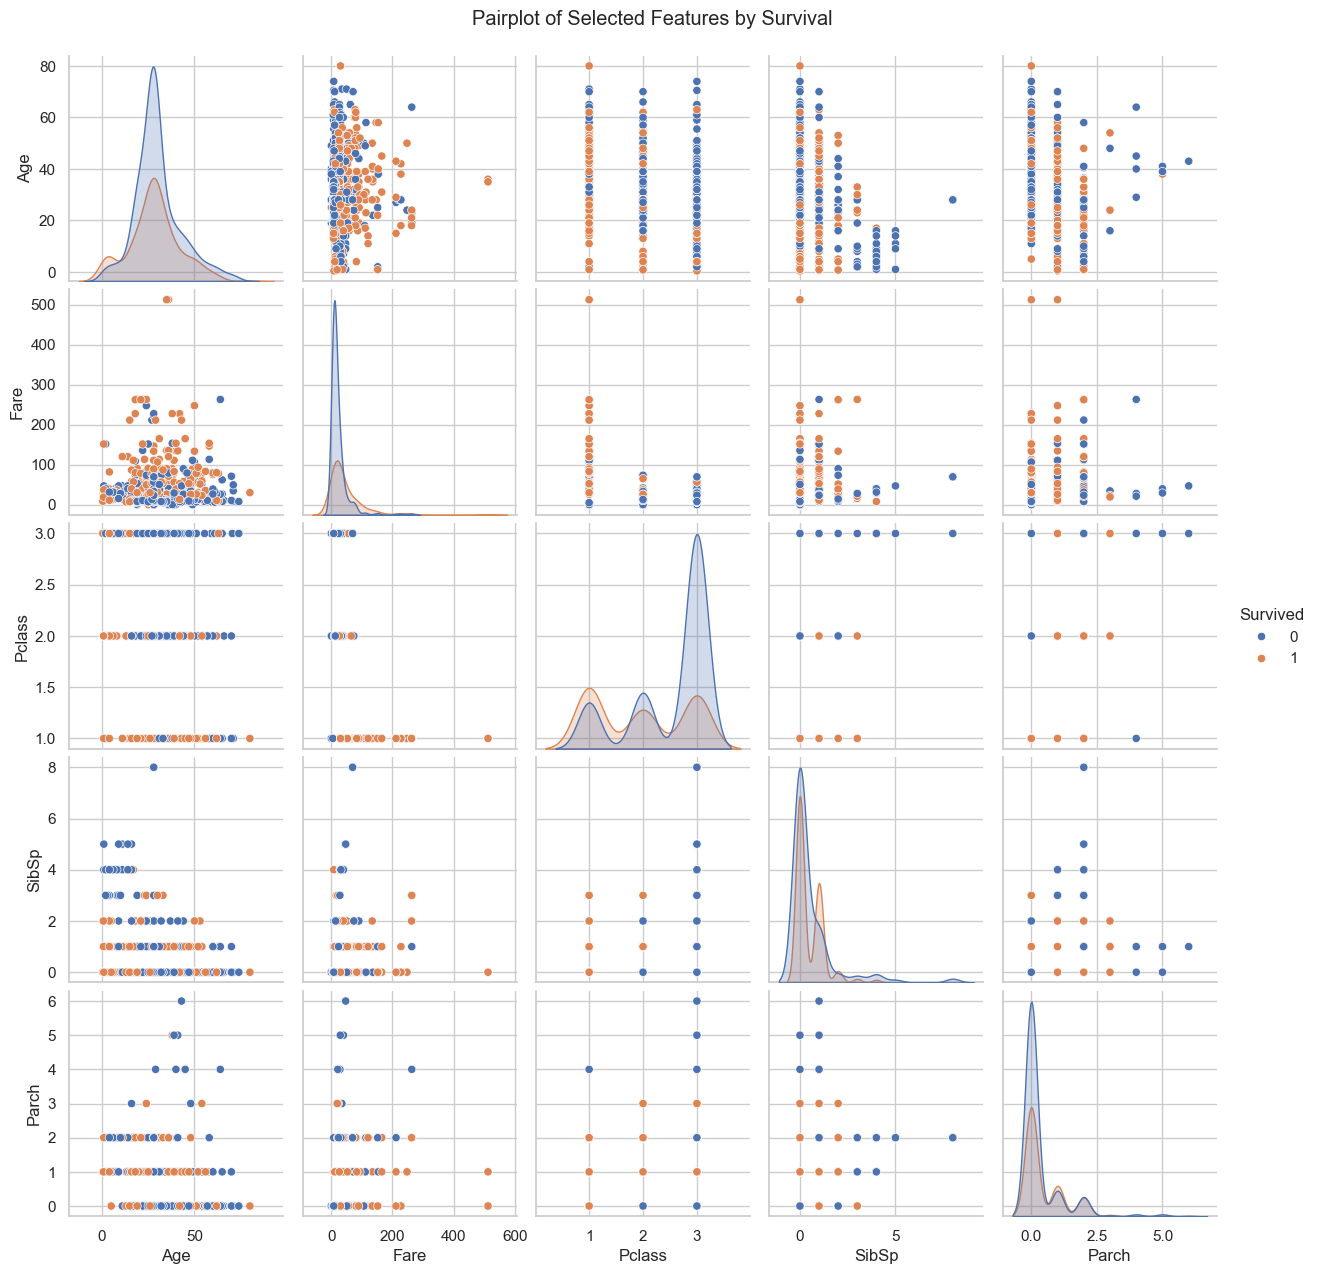

In [36]:
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'])
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)  # Title above the plot
plt.show()

In [ ]:
### Observation: Pairplot of Selected Features by Survival

- **Survivors and non-survivors** show clear differences in Fare and Pclass.
- Higher survival is associated with **higher fares** and **lower Pclass** (1st class).
- There is no strong visible separation by Age alone, but some trends can be seen.
- The plot helps identify patterns and clusters in relation to survival status.


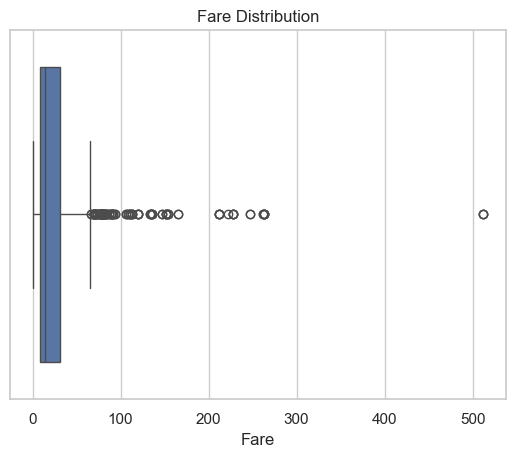

In [27]:
# Plot a boxplot to visualize the distribution of the 'Fare' column
# This helps identify the spread and any outliers (extremely high or low fares)
sns.boxplot(x='Fare', data=df)
plt.title('Fare Distribution')
plt.show()

In [ ]:
### Observation: Fare Distribution (Boxplot)

- The boxplot shows that the majority of passengers paid fares under **100 units**.
- There are several **outliers** with very high fares, indicating a few passengers paid much more than the rest.
- The distribution is **right-skewed**, meaning most passengers paid lower fares while a few paid extremely high amounts.
- This could reflect differences in class or cabin quality (e.g., 1st class vs. 3rd class).


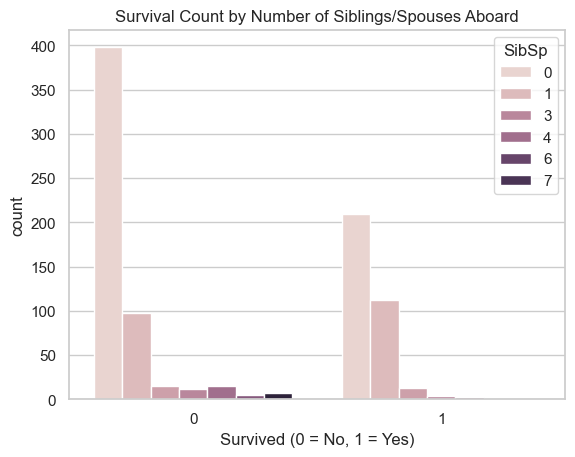

In [32]:
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival Count by Number of Siblings/Spouses Aboard')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
### Observation: Survival by SibSp
- Passengers with 1 or 2 siblings/spouses had better survival rates.
- Having no one or too many family members may reduce survival chances.

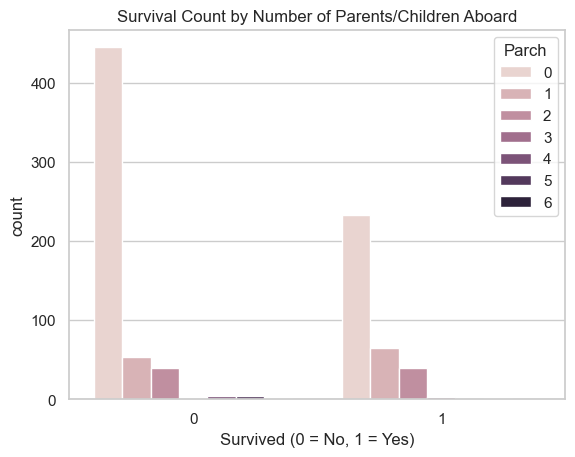

In [34]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival Count by Number of Parents/Children Aboard')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
### Observation: Survival by Number of Parents/Children Aboard (Parch)

- Passengers with **1 to 3 parents or children aboard** had a higher chance of survival compared to those with none or many.
- Those traveling **alone (Parch = 0)** had lower survival rates.
- Extremely high values of Parch (like 4, 5, or 6) were rare and mostly did not survive.
- This suggests that having a small family group onboard may have positively influenced survival chances.

In [ ]:
##final_Summary
- Females had higher survival rates than males.
- 1st class passengers survived more than 2nd and 3rd class.
- Younger passengers, especially children, had better chances of survival.
- Higher fares were linked to higher survival.
- Smaller family groups had better survival rates.
- Survival varied by port of embarkation.
- Overall, gender, age, class, and fare strongly influenced survival.

This analysis helps understand key factors affecting Titanic survival.
